In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from numpy.random import normal, uniform, seed
import numpy as np
%matplotlib inline

In [30]:
with open('data_130+1_100_100-Copy1.pkl', 'rb') as pickle_file:
    plot_array = pickle.load(pickle_file)
with open('data_130+1_100_100times_run-Copy1.pkl', 'rb') as pickle_file:
    times_run = pickle.load(pickle_file)

In [32]:
times_run_nozero = np.transpose(np.nonzero(times_run))
print("Total distinct index: %d" % len(times_run_nozero))
max_times = np.amax(times_run)
min_times = np.amin(times_run)
print("Max number of times: %d" % max_times)
print("Min number of times: %d" % min_times)
idx = np.where( times_run == max_times )
idx = zip(*idx)
for item in idx:
    print("At position: %s - %d" % (item, times_run[item[0], item[1]]))
    
print("Total de vezes rodado: %d" % times_run.sum())

#for element in np.transpose(np.nonzero(times_run)):
#    print("%s - %d" %(element, times_run[element[0], element[1]]))

Total distinct index: 13000
Max number of times: 9514
Min number of times: 1220
At position: (109, 32) - 9514
Total de vezes rodado: 81067000


In [33]:
N_MAX = 130
Q_MAX = 100
N_START = 1
NAME = "data_%d+%d_%d" %(N_MAX, N_START, Q_MAX)
NAME_PNG = NAME + '.png'
NAME_PNG_SCATTER = NAME + '_scatter.png'
NAME_TR_PNG = NAME + '_times_run.png'
print(NAME_PNG)

data_130+1_100.png


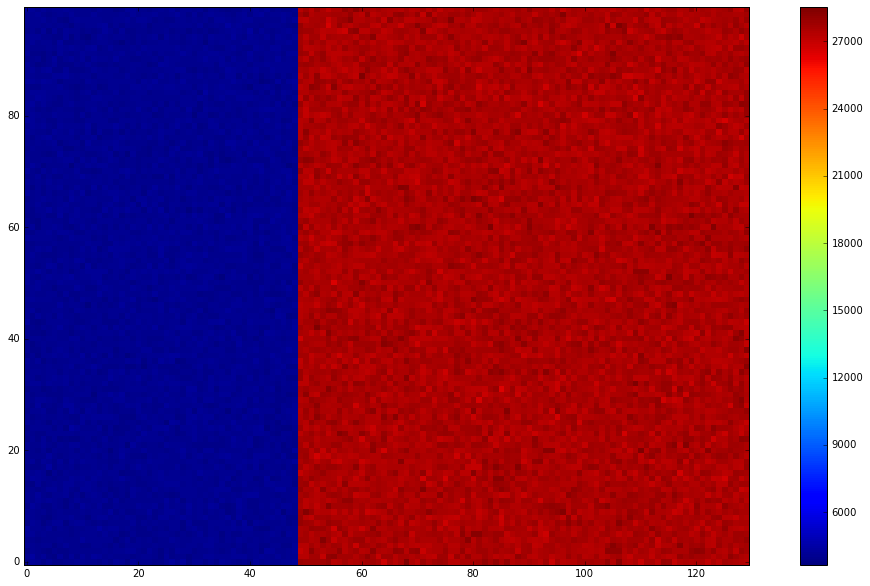

In [38]:
fig, ax = plt.subplots(figsize=(18, 10))
cmap = plt.cm.get_cmap('jet')
im = ax.imshow(times_run.T, cmap=cmap, interpolation="nearest")
               #, 
               #clim=(-0.2,0.2), extent=[11,110,100,0])
#plt.xlim(30, 82)
plt.gca().invert_yaxis()
plt.colorbar(im)
plt.savefig('%s' % NAME_TR_PNG)
plt.show()  # isso mostra os gráficos

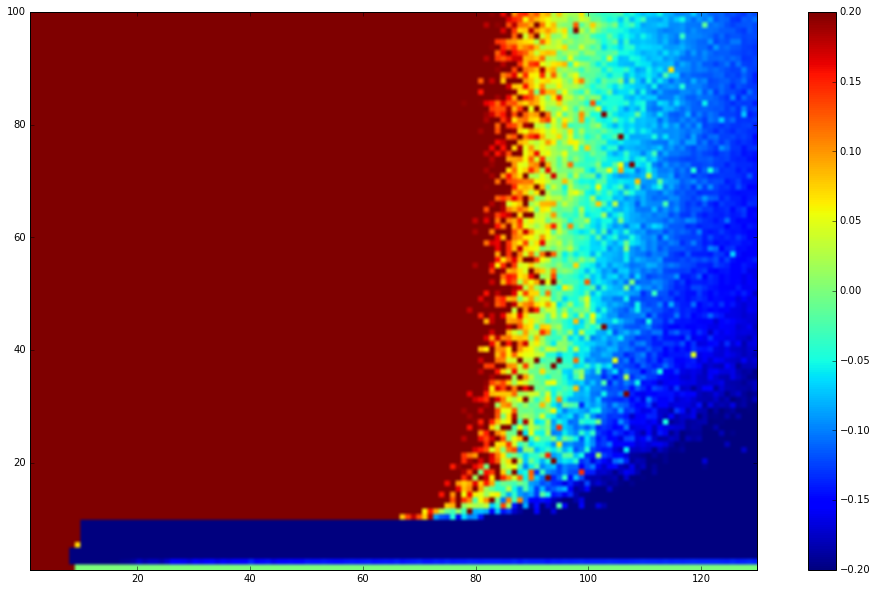

In [36]:
fig, ax = plt.subplots(figsize=(18, 10))
cmap = plt.cm.get_cmap('jet')
im = ax.imshow(plot_array.T, cmap=cmap, interpolation="hanning", clim=(-0.2,0.2), extent=[1,130,100,1])
#plt.xlim(30, 82)
plt.gca().invert_yaxis()
plt.colorbar(im)
plt.savefig('%s' % NAME_PNG)
plt.show()  # isso mostra os gráfico

In [8]:
import itertools

In [40]:
x = range(1,131)
y = range(1,101)
xy = itertools.product(x, y)
x, y = zip(*list(xy))
x = list(x)
y = list(y)
colors = plot_array
fig, ax = plt.subplots(figsize=(18, 10))
cmap = plt.cm.get_cmap('jet')
sc = ax.scatter(x, y, c=colors, vmin=-0.2, vmax=0.2, s=68, cmap=cmap, linewidth=0)
plt.xlim(1, 130)
plt.ylim(1, 100)
plt.colorbar(sc)
plt.xlabel("N - quantidade de observações")
plt.ylabel("Q - complexidade do polinômio")
plt.savefig('%s' % NAME_PNG_SCATTER)